# Les membres

## Les méthodes

Les méthodes en C# ressemblent aux méthodes de Java
Une méthode est constituée de
- Modificateurs optionnels (`private`, `public`, `static`, `internal`, etc.)
- Type de retour (`void`, `int`, `string`, `bool`, `Task` etc.)
- Nom de méthode (`ToString`, `Equals`, etc.)
- Paramètres optionnels (`string` nom, `int` age, etc.)
- Le contenu (body) de la méthode est défini entre des accolades

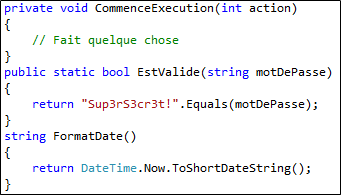

### `Return`

Une méthode peut y avoir plus d’une instruction `return`.

Une méthode avec un retour de type `void` peut appeler un `return` à n’importe quel moment pour terminer l’exécution de la méthode.

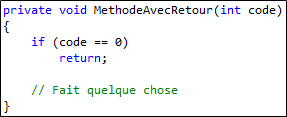

Si une méthode est définie avec un type de retour autre que `void`, elle doit contenir un « `return` » à la fin.

Si un `return` n’est pas mis à la fin de la méthode, chaque bloque conditionnel doit avoir un `return`.

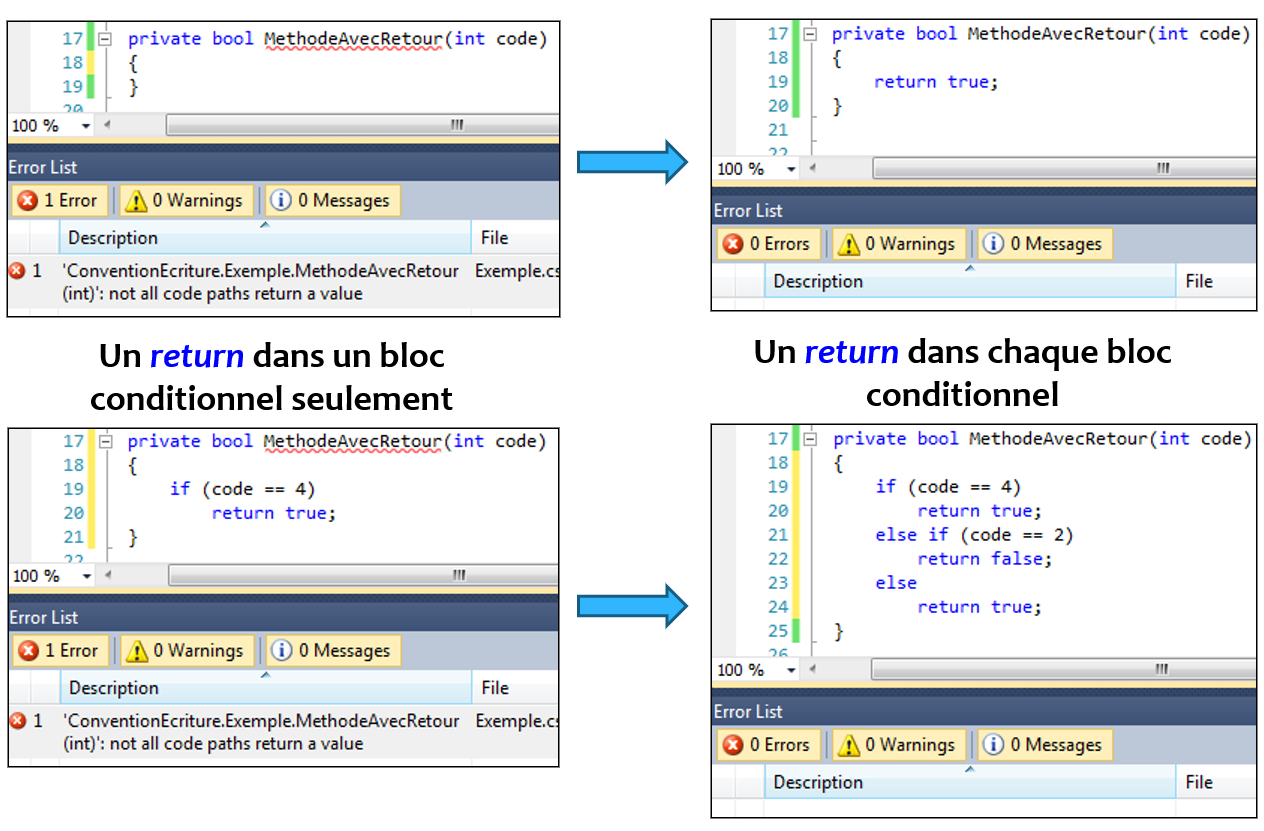

### Paramètres de type « valeur »

Les paramètres de type « valeur » (`int`, `double`, `char`, `string`, etc.) sont passés à une méthode en tant que copie.

- Si la valeur du paramètre est modifiée à l’intérieur de la méthode, cette modification ne sera pas reflétée à l’extérieur de la méthode!

In [17]:
private void ChangeNom(string nom)
{
    Console.WriteLine($"DANS LA MÉTHODE, AVANT:\t{nom}");
    
    // On change le nom içi
    nom = "Test";
    
    Console.WriteLine($"DANS LA MÉTHODE, APRÈS:\t{nom}");
}

var nom = "Charlie";

Console.WriteLine($"AVANT LA MÉTHODE:\t{nom}");

ChangeNom(nom);

Console.WriteLine($"APRÈS LA MÉTHODE:\t{nom}");

AVANT LA MÉTHODE:	Charlie
DANS LA MÉTHODE, AVANT:	Charlie
DANS LA MÉTHODE, APRÈS:	Test
APRÈS LA MÉTHODE:	Charlie


### Paramètres de type « référence »

Les paramètres de type « référence » (`StringBuilder`, etc.) sont passés à une méthode en tant que référence.

- Si le paramètre change d’objet, cette modification ne sera pas reflétée à l’extérieur de la méthode
- Si la valeur du paramètre est modifiée à l’intérieur de la méthode, cette modification sera reflétée à l’extérieur de la méthode

In [24]:
// cette modification ne sera pas reflétée à l’extérieur de la méthode
private void ChangeReference(StringBuilder sb)
{
    sb = new StringBuilder("Paul");
}

// cette modification sera reflétée à l’extérieur de la méthode
private void ModificationReference(StringBuilder sb)
{
    sb.Clear();
    sb.Append("Paul");
}

var exemple1 = new StringBuilder("Charlie");
var exemple2 = new StringBuilder("Charlie");

ChangeReference(exemple1);
ModificationReference(exemple2);

Console.WriteLine(exemple1);
Console.WriteLine(exemple2);

Charlie
Paul


### Paramètres optionnels

Une méthode peut avoir des paramètres optionnels
- Un paramètre optionnel est défini avec l’ajout d’une affectation spécifiant la valeur par défaut
- Les paramètres optionnels doivent être les derniers paramètres de la méthode

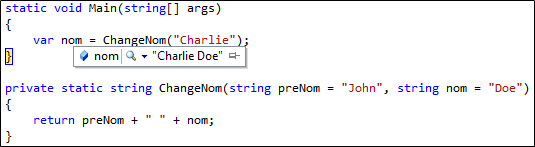

### Ordres des paramètres

L’ordre des paramètres durant l’appel d’une méthode peut être changé grâce à l’utilisation des noms de paramètre
- Très pratique avec les paramètres optionnels puisqu’on peut maintenant choisir quel paramètre on veut définir
- Afin de définir la valeur d’un paramètre spécifique, il suffit de spécifier le nom du paramètre, suivi de deux points(:) et de la valeur

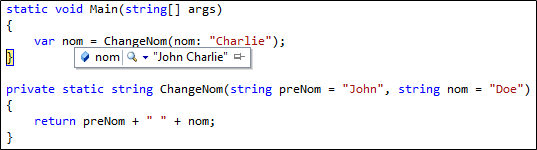

In [1]:
private string NouveauNom(string prenom = "John", string nom = "Doe")
{
    return $"{prenom} {nom}";
}

var nomComplet = NouveauNom(nom: "Lagacé");
nomComplet

John Lagacé

## Les champs

Les champs sont des variables déclarées dans la portée de la classe.

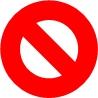

 > Utilisez des champs uniquement pour des variables qui ont une accessibilité **privée**.
 >
 > Les données que votre classe expose au code client doivent être fournies par le biais de méthodes, propriétés et indexeurs. 

---

```cs
public class Personne
{
    public string nom;
    public Personne meilleurAmi;
}
```

vs

```cs
public class Personne
{
    private readonly string _nom;
    private Personne _meilleurAmi;

    public Personne(string nom)
    {
        this._nom = nom;
    }
}
```

## Les propriétés (accesseurs et mutateurs)

Un programmeur peut souvent décider qu’il ne veut pas donner accès direct à une variable puisqu’il doit premièrement valider la valeur.

 - La solution à ce problème est de créer un accesseur (Get) et un mutateur (Set) pour la variable

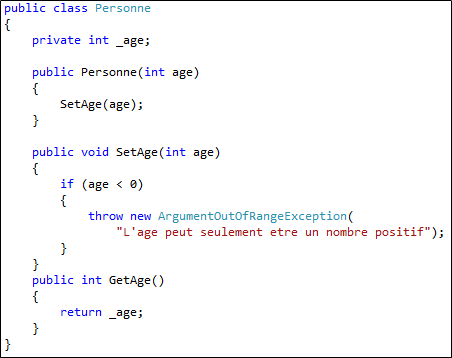


.NET dispose d’une technique pouvant simplifier la création d’accesseurs et de mutateurs pour une variable: les propriétés
Une propriété traditionnelle requiert généralement trois sections:
- La variable privée (1)
- La propriété publique
  - Accesseur (2)
  - Mutateur (3)
  
La création d’une propriété est très similaire à la création d’une variable non initialisée; au lieu de mettre un point virgule après le nom de variable, il suffit de déclarer l’accesseur et le mutateur entre accolades.

Une propriété simple est composée de:
- Son accès (modificateur d’accès)
- Son type de retour
- Son nom
- Son contenu entre accolades
  - Le mot clé « `get` » (avec modificateurs d’accès optionnels)
    - Suivi du code entre accolades
  - Le mot clé « `set` » (avec modificateurs d’accès optionnels)
    - Suivi du code entre accolades

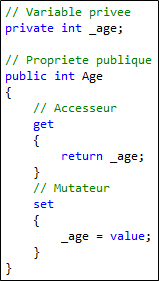

Le code retrouvé à l’intérieur des accesseurs et des mutateurs peut être n’importe quoi tant que le mutateur retourne une valeur (du même type que la propriété)

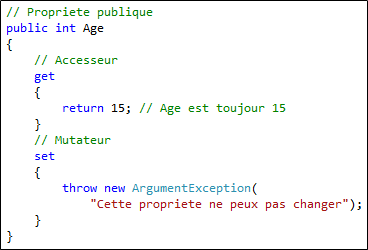

L’accès aux accesseurs et mutateurs peut également être modifié avec les modificateurs d’accès.

 - **Exemple :** la propriété peut seulement être modifiée à l’intérieur de la classe, mais peut être lue n’importe où

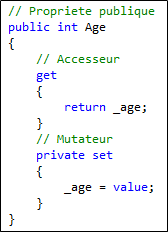

### Accesseur

Un accesseur est défini par le mot clé « `get` » suivi par un bloc de code.

Un accesseur doit toujours retourner (à l’aide l’expression « `return` ») une valeur du même type que la propriété.

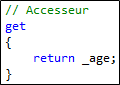

### Mutateur

Un mutateur est défini par le mot clé « `set` » suivi par un bloc de code.

Le code du mutateur est appelé lorsqu’une valeur est affectée à la propriété.

- Pour accéder à cette valeur, il suffit d’utiliser le mot clé « `value` » qui va toujours représenter un objet de type identique à la propriété.

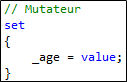

### Modes

Une propriété peut être mis en mode lecture-seulement ou en mode écriture-seulement.

Pour transformer une propriété en:
- Lecture-seulement : enlève le mutateur
- Écriture-seulement : enlève l’accesseur

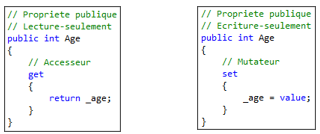

### Les propriétés automatiques

C# permet la création de propriétés automatiques dans le cas où un programmeur ne veut pas vérifier les valeurs, mais simplement restreindre l’accès soit à l’accesseur, le mutateur ou les deux.

 > (Une propriété automatique peut aussi être utilisée afin de créer une propriété simple sans aucune restriction d’accès)
 
Une propriété automatique est composée de:
- Son accès (modificateur d’accès)
- Son type de retour
- Son nom
- Son contenu entre accolades
  - Le mot clé « `get` » (avec modificateurs d’accès optionnels) et un point virgule (`;`)
  - Le mot clé « `set` » ou « `init` » (avec modificateurs d’accès optionnels) et un point virgule (`;`)
  
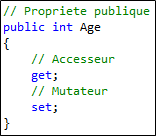

Puisqu’une propriété automatique ne contient aucun code pour les accesseurs et mutateurs, une variable privée ne va pas être utilisée.

 - Cela n’est pas un problème puisque, comme le nom le dit, la variable est automatiquement créée pour vous avec une propriété automatique.

Les propriétés automatiques ne supportent pas les modes lecture-seulement et écriture-seulement.

Par contre, les propriétés automatiques supportent le mode `init` qui permet une valeur d’être définis au moment de la création de l’objet. Cela permet un modèle immuable.

In [7]:
public class Personne
{
    public string Prenom { get; set; }
    public string Nom { get; init; }
}

var alice = new Personne { Prenom = "Alice", Nom = "Côté" };

alice.Prenom = "test";
alice.Nom    = "test"; // error CS8852: Init-only property


(10,1): error CS8852: Init-only property or indexer 'Personne.Nom' can only be assigned in an object initializer, or on 'this' or 'base' in an instance constructor or an 'init' accessor.



Cell not executed: compilation error